In [0]:
#Experiment 1:  Build the best network you can using Keras

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd /content/drive/My Drive/MaxNet Data  

/content/drive/My Drive/MaxNet Data


In [0]:
!tar -xf ImageNet_Data.tar

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils.sequence  import steps_per_epoch 
from keras.optimizers import adamax
import os
import matplotlib.pyplot as plt

batch_size = 256
num_classes = 200
epochs = 10
data_augmentation = True
#num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_MaxNet_trained_model.h5'

# The data, split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.24))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.24))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.adamax()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

    
    
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/MaxNet Data/ImageNet_Data/Train',
        target_size=(32, 32),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/MaxNet Data/ImageNet_Data/Validation',
        target_size=(32, 32),
        batch_size=50,
        class_mode='categorical')

train_history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=200)    

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)



Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/10
2000/2000 [==============================] - 567s 284ms/step - loss: 5.2069 - acc: 0.0096 - val_loss: 5.0434 - val_acc: 0.0175
Epoch 2/10
2000/2000 [==============================] - 561s 281ms/step - loss: 4.9107 - acc: 0.0292 - val_loss: 4.6725 - val_acc: 0.0494
Epoch 3/10
2000/2000 [==============================] - 555s 278ms/step - loss: 4.6203 - acc: 0.0553 - val_loss: 4.3437 - val_acc: 0.0891
Epoch 4/10
2000/2000 [==============================] - 574s 287ms/step - loss: 4.4163 - acc: 0.0778 - val_loss: 4.2053 - val_acc: 0.1101
Epoch 5/10
2000/2000 [==============================] - 565s 282ms/step - loss: 4.2657 - acc: 0.0972 - val_loss: 4.0046 - val_acc: 0.1329
Epoch 6/10
2000/2000 [==============================] - 562s 281ms/step - loss: 4.1301 - acc: 0.1127 - val_loss: 3.8770 - val_acc: 0.1516
Epoch 7/10
2000/2000 [==============================] - 577s 289ms/step - loss: 4

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


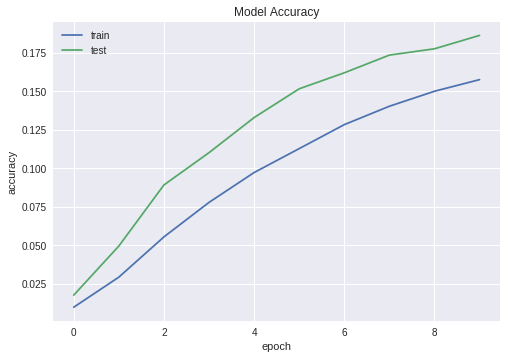

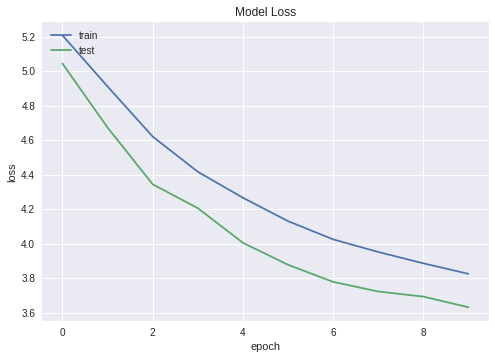

In [0]:

# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils.sequence  import steps_per_epoch 
from keras.optimizers import adamax
import os
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 200
epochs = 20
data_augmentation = True
#num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_MaxNet_trained_model.h5'

# The data, split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.24))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.24))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.adamax()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

    
    
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/MaxNet Data/ImageNet_Data/Train',
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/MaxNet Data/ImageNet_Data/Validation',
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

train_history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=200)    

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)



# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/20
2000/2000 [==============================] - 960s 480ms/step - loss: 5.1419 - acc: 0.0140 - val_loss: 4.7686 - val_acc: 0.0474
Epoch 2/20
2000/2000 [==============================] - 942s 471ms/step - loss: 4.5540 - acc: 0.0646 - val_loss: 4.1563 - val_acc: 0.1102
Epoch 3/20
2000/2000 [==============================] - 938s 469ms/step - loss: 4.1697 - acc: 0.1098 - val_loss: 3.8726 - val_acc: 0.1487
Epoch 4/20
2000/2000 [==============================] - 945s 473ms/step - loss: 3.9208 - acc: 0.1439 - val_loss: 3.7936 - val_acc: 0.1620
Epoch 5/20
2000/2000 [==============================] - 1025s 512ms/step - loss: 3.7589 - acc: 0.1679 - val_loss: 3.5823 - val_acc: 0.1936
Epoch 6/20
2000/2000 [==============================] - 1053s 526ms/step - loss: 3.6498 - acc: 0.1860 - val_loss: 3.4555 - val_acc: 0.2202
Epoch 7/20
2000/2000 [==============================] - 1052s 526ms/step - loss

In [0]:
# Classification of Test data 

